# ***Engr.Muhammad Javed***

## **Bagging (Regression):**

## *Importing Required Libraries*


In [12]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , r2_score , mean_squared_error
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.datasets import make_moons


## *Loading the Dataset*


In [2]:
Dataset = pd.read_csv(r"E:\AI and Data Science\ML with Engr.Muhammad Javed\File\placement.csv")

## *Show Dataset*


In [3]:
Dataset.head()


,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


## *Splitting Features and target Variable*


In [4]:
x = Dataset[["cgpa"]]
y = Dataset["package"]

## *Splitting Dataset into Training and Testing Sets*


In [5]:
X_train , X_test , Y_train , Y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [6]:
from sklearn.ensemble import BaggingRegressor 

##  *Visualize relation*


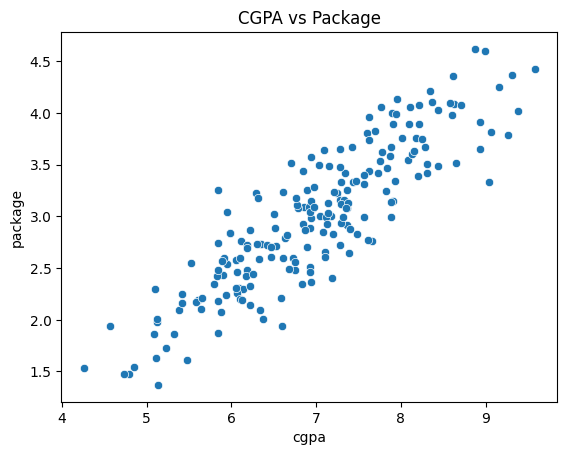

In [7]:
sn.scatterplot(x='cgpa', y='package', data=Dataset)
plt.title("CGPA vs Package")
plt.show()

## *Create and train Bagging Regressor*


In [9]:
model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=30,
    random_state=42
)

model.fit(X_train, Y_train)

,estimator,DecisionTreeRegressor()
,n_estimators,30
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [10]:
Y_pred = model.predict(X_test)


## *Compare actual vs predicted*


In [11]:
results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(results.head())

     Actual  Predicted
95     2.79   2.868889
15     3.23   3.184465
30     3.26   3.037333
158    3.04   2.534000
128    3.34   3.902900


## *Evaluate model performance*


In [13]:
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print("R² Score :", r2)
print("MSE :", mse)
print("RMSE :", rmse)

R² Score : 0.666786994805814
MSE : 0.12361600626713667
RMSE : 0.35159068000607846


## *Visualize results*


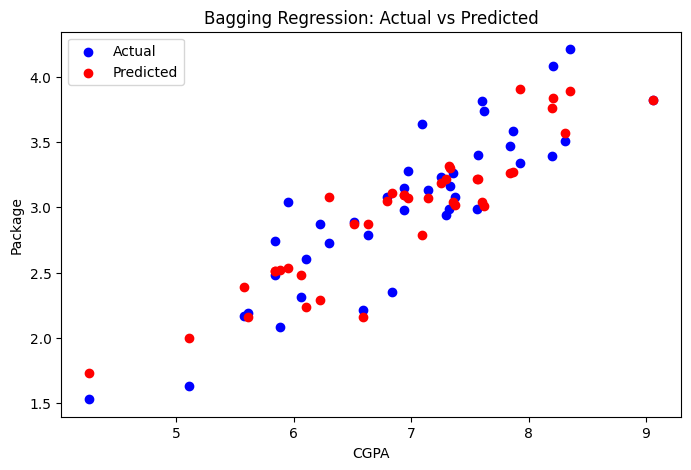

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.scatter(X_test, Y_pred, color='red', label='Predicted')
plt.title("Bagging Regression: Actual vs Predicted")
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.legend()
plt.show()